# Compare DQN improvements
- Double DQN
- Dueling DQN
- Prioritized experience replay

In [5]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Load scores

In [6]:
experiment_dirs = list(Path('../experiments').glob('*'))

In [9]:
experiments = [
    ('_'.join(experiment.name.split('_')[2:]), pd.read_csv(experiment / 'scores.csv'))
    for experiment in experiment_dirs
    if (experiment / 'scores.csv').exists()
    if experiment.name.startswith('final_comparison')]

[e[0] for e in experiments]

['dueling_double_dqn', 'dueling_double_per_dqn', 'dueling_dqn', 'dqn']

## Comparison graphs

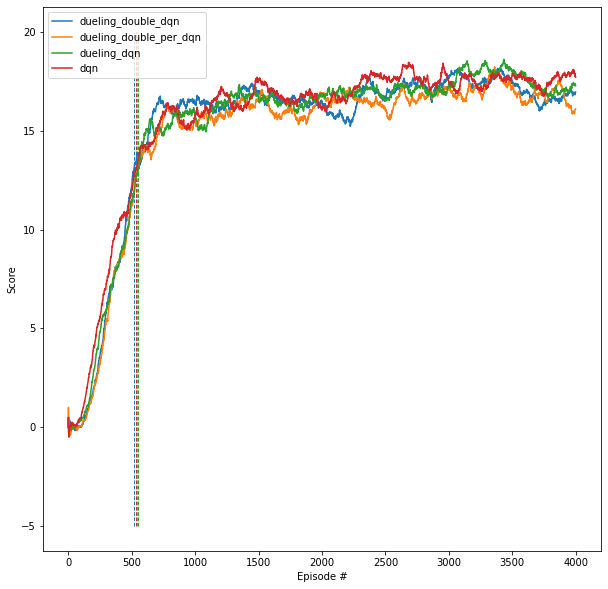

In [11]:
plt.figure(figsize=(10, 10))
plt.xlabel('Episode #')
plt.ylabel('Score')

for ([name, scores], color) in zip(experiments, mcolors.TABLEAU_COLORS):
    ylim = (-5, 20)
    smoothened_scores = scores['score'].rolling(window=100, min_periods=0).mean()
    plt.plot(scores['episode'], smoothened_scores, label=name, color=color)
    
    solution_episodes = scores['episode'][smoothened_scores >= 13.0]
    if len(solution_episodes) > 0:
        first_solution_episode = solution_episodes.iloc[0]
        plt.vlines(first_solution_episode, *ylim, linestyle='--', linewidth=1, color=color)

plt.legend()
plt.savefig('../artifacts/dqn_improvements_comparison.png')
plt.show()

In [17]:
[(e[0], e[1][2500:]['score'].mean()) for e in experiments]

[('dueling_double_dqn', 17.212),
 ('dueling_double_per_dqn', 16.887333333333334),
 ('dueling_dqn', 17.485333333333333),
 ('dqn', 17.6)]